In [1095]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1096]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


1. Perform missing data handling for columns with null values.

In [1097]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [1098]:
df['Medal'].fillna('None', inplace = True)

C:\Users\Yakina\AppData\Local\Temp\ipykernel_18144\1536747687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('None', inplace = True)


In [1099]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

2. Calculate summary statistics for numerical columns like age, height, and weight.

In [1100]:
df[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


3. Find out how many unique athletes are in the dataset.

In [1101]:
df['Name'].nunique()

134732

4. Plot a bar chart showing the distribution of medals (Gold, Silver, Bronze, NA).

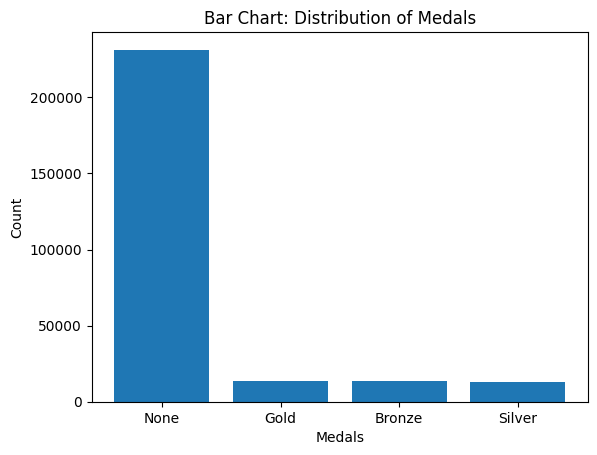

In [1102]:
plt.bar(df['Medal'].unique(), df['Medal'].value_counts())
plt.title('Bar Chart: Distribution of Medals')
plt.xlabel('Medals')
plt.ylabel('Count')
plt.show()

5. Create a pie chart to visualize the distribution of male and female athletes.

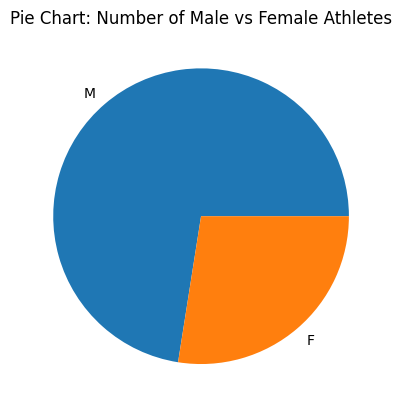

In [1103]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].unique())
plt.title('Pie Chart: Number of Male vs Female Athletes')
plt.show()

6. List the top 5 countries with the most medals.

In [1104]:
df['Team'].value_counts().head(5)

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

7. Plot a histogram to visualize the distribution of athletes' ages.

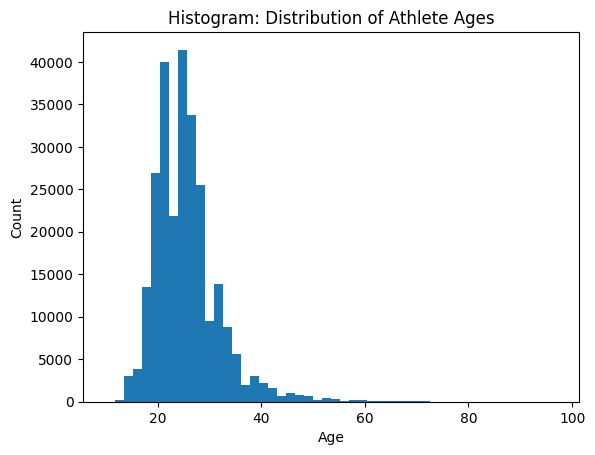

In [1105]:
plt.hist(df['Age'], bins=50)
plt.title('Histogram: Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

8. Plot a line chart showing the trend of participation in the Olympics over the years.

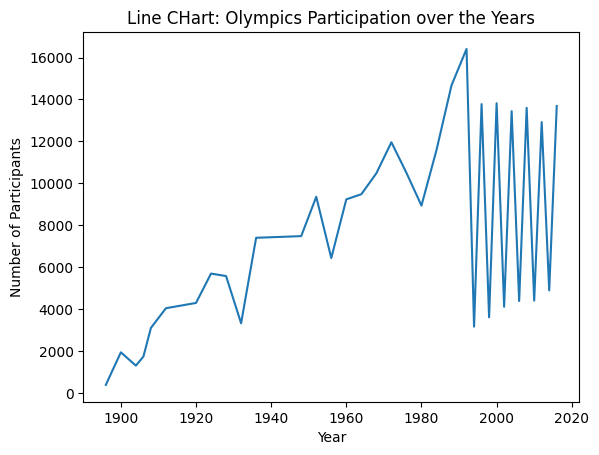

In [ ]:
plt.plot(df['Year'].value_counts().sort_index())
plt.title('Line Chart: Olympics Participation over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.show()

9. Create a scatter plot to explore the relationship between height and weight.

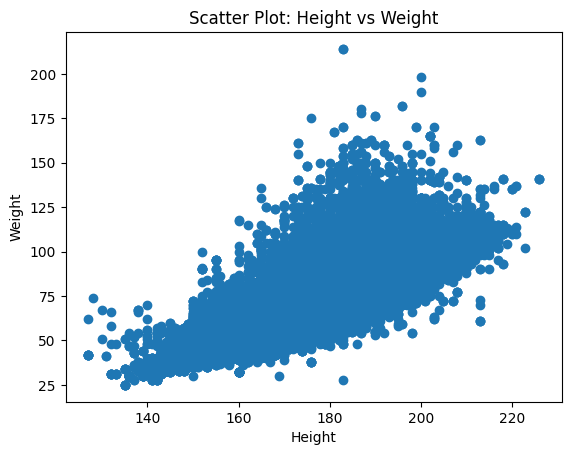

In [1107]:
plt.scatter(df['Height'], df['Weight'])
plt.title('Scatter Plot: Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

10. Count the number of unique sports in the dataset.

In [1108]:
df['Sport'].nunique()

66

11. Plot a bar chart to visualize the distribution of events across different sports.

In [1109]:
events = df.groupby('Sport')['Event'].nunique().reset_index()
events

,Sport,Event
0,Aeronautics,1
1,Alpine Skiing,10
2,Alpinism,1
3,Archery,29
4,Art Competitions,29
...,...,...
61,Tug-Of-War,1
62,Volleyball,2
63,Water Polo,2
64,Weightlifting,21


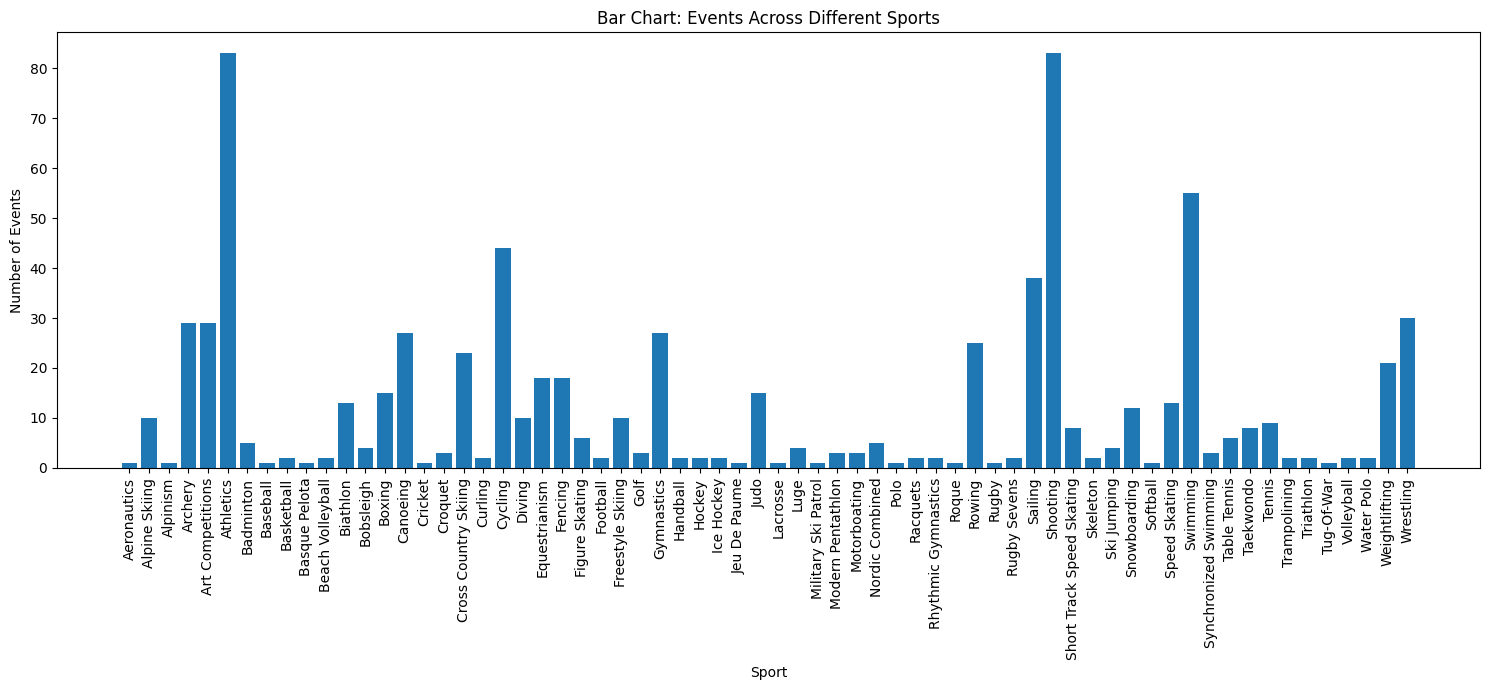

In [1110]:
plt.figure(figsize=(15, 7))
plt.bar(events['Sport'], events['Event'])
plt.title('Bar Chart: Events Across Different Sports')
plt.xlabel('Sport')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()